## Data Cleaning

In [1]:
import pandas as pd
df1 = pd.read_csv('game_data/games.csv')
df2 = pd.read_csv('game_data/march copy.csv')
df2 = df2[df2['YEAR'] < 2020]
df2

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2019,VCU,A10,32.0,25.0,7.0,0.781,104.0,86.9,50.6,...,43.8,30.7,27.6,41.1,33.4,70.0,1.4,8.0,R64,0.0
764,2019,Abilene Christian,Slnd,29.0,23.0,6.0,0.793,102.2,101.0,52.4,...,49.2,38.3,33.5,34.2,33.4,66.3,-2.5,15.0,R64,0.0
765,2019,Saint Louis,A10,35.0,23.0,12.0,0.657,101.1,95.4,46.8,...,46.9,30.8,31.3,32.6,38.0,67.7,-3.0,13.0,R64,0.0
766,2019,Old Dominion,CUSA,34.0,26.0,8.0,0.765,100.4,95.5,47.7,...,43.5,35.3,32.5,37.3,40.1,69.5,-1.6,14.0,R64,0.0


In [2]:
def corrected_expected_wins(seed):
    if 9 <= seed <= 16:
        return 0
    elif 5 <= seed <= 8:
        return 1
    elif 3 <= seed <= 4:
        return 2
    elif seed == 2:
        return 4
    elif seed == 1:
        return 5
    else:
        return 0  # Default case for any unexpected seed values

# Apply the updated function to calculate the correct expected wins
df2['Corrected_Expected_Wins'] = df2['SEED'].apply(corrected_expected_wins)

# Recalculate Cinderella score based on the corrected expected wins
df2['Cinderella'] = df2['T_WINS'] - df2['Corrected_Expected_Wins']
df2.to_csv('cinderella.csv')
df2 = df2.sort_values(by='Cinderella', ascending=False)
df_cinderella = df2[(df2['Cinderella'] > 1) & (df2['SEED'] > 2) & (df2['YEAR'] < 2021)]
df_not_cinderella = df2[(df2['Cinderella'] <= 1) & (df2['SEED'] > 2) & (df2['YEAR'] < 2021)]
df_cinderella.sort_values(by='Cinderella', ascending=False)
df_not_cinderella.sort_values(by='YEAR', ascending=False)



,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella
738,2019,Murray St.,OVC,29.0,25.0,4.0,0.862,110.5,98.5,55.2,...,28.5,36.9,35.4,69.8,1.3,12.0,R32,1.0,0,1.0
750,2019,Ohio St.,B10,33.0,19.0,14.0,0.576,108.3,94.1,50.5,...,33.0,39.7,37.4,67.0,0.9,11.0,R32,1.0,0,1.0
722,2019,Houston,Amer,34.0,31.0,3.0,0.912,114.1,90.9,52.1,...,27.6,42.9,41.1,67.0,7.9,3.0,Sweet Sixteen,2.0,2,0.0
721,2019,Saint Mary's,WCC,33.0,22.0,11.0,0.667,114.2,97.3,54.0,...,31.8,35.0,31.4,63.8,-0.6,11.0,R64,0.0,0,0.0
720,2019,Villanova,BE,34.0,25.0,9.0,0.735,115.1,98.7,53.4,...,33.5,53.5,39.3,64.8,3.7,6.0,R32,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2008,Oklahoma,B12,33.0,22.0,11.0,0.667,108.0,92.3,50.1,...,31.9,33.5,35.0,65.4,2.8,6.0,R32,1.0,1,0.0
41,2008,Saint Mary's,WCC,30.0,24.0,6.0,0.800,108.2,92.7,52.7,...,31.0,37.9,26.1,68.2,1.2,10.0,R64,0.0,0,0.0
40,2008,UNLV,MWC,32.0,25.0,7.0,0.781,108.2,93.9,48.8,...,29.9,39.8,37.2,66.1,2.2,8.0,R32,1.0,1,0.0
38,2008,Purdue,B10,32.0,24.0,8.0,0.750,108.7,90.2,49.0,...,35.0,36.1,31.4,68.2,3.8,6.0,R32,1.0,1,0.0


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go  # Correct import for creating table and other non-express figures

data = pd.read_csv('game_data/cinderella.csv')

# Filter the data for Cinderella ratings of 2 or higher
filtered_data = data[data['Cinderella'] >= 3]

# Sort the filtered data by Cinderella rating in descending order for better visibility
filtered_data = filtered_data.sort_values(by='Cinderella', ascending=False)

# Create an interactive table using Plotly graph_objects
fig = go.Figure(data=[go.Table(
    header=dict(values=['Year', 'Team', 'Cinderella Rating', 'Seed', 'Finish'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[filtered_data.YEAR, filtered_data.TEAM, filtered_data.Cinderella,
                       filtered_data.SEED, filtered_data.FINISH],
               fill_color='lavender',
               align='left'))
])

# Update layout for better visibility
fig.update_layout(
    width=950, 
    height=1400, 
    title={
        'text': "Table of Teams with Cinderella Ratings of 3 and Higher (2008-2019)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the plot
fig.show()



In the provided table, the distribution of college basketball teams with a Cinderella rating above two is displayed, offering a snapshot of underdog performances in NCAA tournaments. Each row represents a team, sorted by its Cinderella rating, which gauges the unexpectedness of a team's tournament run relative to their perceived pre-tournament strength. Alongside the ratings, we see the tournament seed, which indicates the team's initial ranking, and the team's final finish in the tournament. The "Year" and "Team" columns provide context to the performance, while the Cinderella rating serves as a numerical value of the surprise factor. 

In [4]:

df2['Adjusted_Cinderella'] = df2['Cinderella'].apply(lambda x: max(x, 0))

# Find unique Cinderella scores from the adjusted column
unique_cinderella_scores = df2['Adjusted_Cinderella'].unique()

# Dictionary to hold dataframes for each unique adjusted Cinderella score
cinderella_dfs = {}

for score in unique_cinderella_scores:
    # Filter df2 for each unique score and create a separate dataframe
    cinderella_dfs[score] = df2[df2['Adjusted_Cinderella'] == score]

# Now cinderella_dfs[score] will give you the dataframe for each unique adjusted Cinderella score


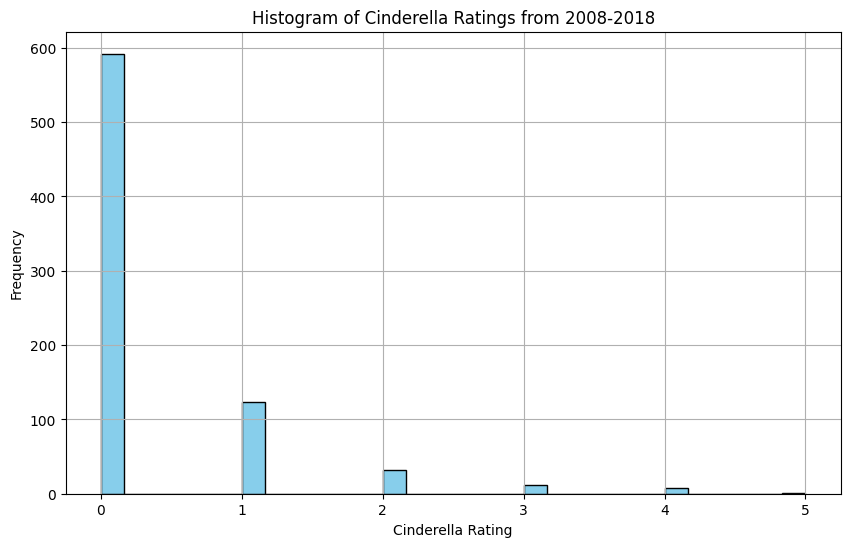

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df2['Adjusted_Cinderella'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Cinderella Ratings from 2008-2018')
plt.xlabel('Cinderella Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [6]:
df2['Adjusted_Cinderella'].to_csv('march_cinderella.csv', index=False)

In [7]:
cinderella_dfs[0].sort_values(by='YEAR', ascending=False)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
766,2019,Old Dominion,CUSA,34.0,26.0,8.0,0.765,100.4,95.5,47.7,...,37.3,40.1,69.5,-1.6,14.0,R64,0.0,0,0.0,0.0
724,2019,Buffalo,MAC,33.0,30.0,3.0,0.909,113.2,95.2,53.4,...,43.9,36.1,74.2,5.7,6.0,R32,1.0,1,0.0,0.0
725,2019,Mississippi,SEC,32.0,20.0,12.0,0.625,113.1,96.6,53.0,...,39.5,34.9,69.0,1.0,8.0,R64,0.0,1,-1.0,0.0
713,2019,Iowa St.,B12,34.0,23.0,11.0,0.676,118.2,96.1,54.9,...,39.6,39.3,68.6,4.3,6.0,R64,0.0,1,-1.0,0.0
714,2019,Virginia Tech,ACC,32.0,24.0,8.0,0.750,118.0,94.3,56.4,...,45.0,50.1,65.3,5.0,4.0,Sweet Sixteen,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2008,Washington St.,P10,32.0,24.0,8.0,0.750,114.2,91.7,54.4,...,34.4,32.5,60.1,4.9,4.0,Sweet Sixteen,2.0,2,0.0,0.0
19,2008,Saint Joseph's,A10,33.0,21.0,12.0,0.636,113.3,98.5,54.6,...,35.8,37.7,65.5,-1.2,11.0,R64,0.0,0,0.0,0.0
20,2008,Memphis,CUSA,34.0,33.0,1.0,0.971,113.3,83.8,53.0,...,36.7,28.7,70.7,8.9,1.0,Finals,5.0,5,0.0,0.0
5,2008,Duke,ACC,32.0,27.0,5.0,0.844,117.2,88.8,54.1,...,39.1,24.8,73.7,8.9,2.0,R32,1.0,4,-3.0,0.0


In [8]:
cinderella_dfs[1].sort_values(by='SEED')

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
340,2013,Louisville,BE,34.0,29.0,5.0,0.853,112.6,83.5,49.5,...,30.3,33.5,67.5,9.0,1.0,CHAMPS,6.0,5,1.0,1.0
706,2019,Virginia,ACC,32.0,29.0,3.0,0.906,122.6,88.7,55.7,...,38.7,40.9,61.5,11.1,1.0,CHAMPS,6.0,5,1.0,1.0
449,2015,Duke,ACC,33.0,29.0,4.0,0.879,124.6,93.1,56.9,...,34.5,27.7,66.8,10.6,1.0,CHAMPS,6.0,5,1.0,1.0
258,2012,Kentucky,SEC,34.0,32.0,2.0,0.941,119.7,88.5,53.4,...,27.3,30.0,66.1,11.3,1.0,CHAMPS,6.0,5,1.0,1.0
640,2018,Villanova,BE,34.0,30.0,4.0,0.882,127.7,95.4,59.7,...,46.6,35.5,69.5,10.6,1.0,CHAMPS,6.0,5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2014,Mercer,ASun,31.0,23.0,8.0,0.742,108.4,101.0,53.9,...,37.2,36.3,65.4,-2.6,14.0,R32,1.0,0,1.0,1.0
571,2016,Middle Tennessee,CUSA,31.0,22.0,9.0,0.710,102.2,98.6,51.8,...,35.7,33.8,68.6,-3.0,15.0,R32,1.0,0,1.0,1.0
301,2012,Lehigh,Pat,32.0,25.0,7.0,0.781,106.7,98.8,50.9,...,36.1,32.2,68.7,-1.1,15.0,R32,1.0,0,1.0,1.0
318,2012,Norfolk St.,MEAC,32.0,24.0,8.0,0.750,97.8,99.9,49.7,...,31.4,32.0,68.0,-2.7,15.0,R32,1.0,0,1.0,1.0


In [9]:
cinderella_dfs[2].sort_values(by='YEAR')

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
45,2008,Villanova,BE,32.0,20.0,12.0,0.625,107.7,95.0,49.0,...,35.6,40.5,69.4,0.3,12.0,Sweet Sixteen,2.0,0,2.0,2.0
39,2008,Western Kentucky,SB,31.0,25.0,6.0,0.806,108.6,95.5,53.6,...,32.4,31.6,69.0,0.2,12.0,Sweet Sixteen,2.0,0,2.0,2.0
85,2009,Villanova,BE,33.0,26.0,7.0,0.788,112.4,91.0,51.5,...,31.6,41.2,68.2,6.0,3.0,Final Four,4.0,2,2.0,2.0
71,2009,Arizona,P10,32.0,19.0,13.0,0.594,116.3,99.8,53.2,...,29.0,40.7,65.4,0.7,12.0,Sweet Sixteen,2.0,0,2.0,2.0
172,2010,Northern Iowa,MVC,32.0,28.0,4.0,0.875,107.0,89.5,49.7,...,37.4,35.4,60.3,3.9,9.0,Sweet Sixteen,2.0,0,2.0,2.0
156,2010,Washington,P10,33.0,24.0,9.0,0.727,111.3,93.3,49.4,...,25.8,27.1,73.3,1.2,11.0,Sweet Sixteen,2.0,0,2.0,2.0
148,2010,Cornell,Ivy,29.0,25.0,4.0,0.862,114.0,100.9,56.4,...,39.9,31.1,65.9,2.0,12.0,Sweet Sixteen,2.0,0,2.0,2.0
140,2010,Saint Mary's,WCC,30.0,25.0,5.0,0.833,115.2,97.3,55.7,...,35.6,22.5,68.2,2.0,10.0,Sweet Sixteen,2.0,0,2.0,2.0
173,2010,Tennessee,SEC,33.0,25.0,8.0,0.758,106.7,89.5,50.2,...,31.7,38.0,69.6,3.9,6.0,Elite Eight,3.0,1,2.0,2.0
197,2011,Kentucky,SEC,33.0,25.0,8.0,0.758,118.4,92.2,52.4,...,31.9,29.9,66.9,5.2,4.0,Final Four,4.0,2,2.0,2.0


In [10]:
cinderella_dfs[3].sort_values(by='YEAR', ascending=False)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
709,2019,Auburn,SEC,34.0,25.0,9.0,0.735,119.4,95.9,54.2,...,49.6,44.1,69.0,6.1,5.0,Final Four,4.0,1,3.0,3.0
732,2019,Texas Tech,B12,32.0,26.0,6.0,0.812,112.1,86.3,53.7,...,35.5,39.7,67.2,7.0,3.0,Finals,5.0,2,3.0,3.0
675,2018,Kansas St.,B12,33.0,22.0,11.0,0.667,112.3,95.8,53.5,...,36.8,39.7,66.5,2.5,9.0,Elite Eight,3.0,0,3.0,3.0
669,2018,Michigan,B10,34.0,27.0,7.0,0.794,114.3,92.5,54.4,...,43.1,30.2,65.7,6.9,3.0,Finals,5.0,2,3.0,3.0
666,2018,Florida St.,ACC,31.0,20.0,11.0,0.645,114.5,98.4,53.9,...,36.9,37.6,73.0,1.0,9.0,Elite Eight,3.0,0,3.0,3.0
633,2017,South Carolina,SEC,31.0,21.0,10.0,0.677,105.2,88.3,46.7,...,33.7,33.9,69.6,1.7,7.0,Final Four,4.0,1,3.0,3.0
604,2017,Xavier,BE,34.0,21.0,13.0,0.618,114.5,97.3,51.6,...,36.4,39.2,68.7,1.6,11.0,Elite Eight,3.0,0,3.0,3.0
462,2015,Michigan St.,B10,34.0,23.0,11.0,0.676,114.8,92.6,53.8,...,34.7,35.3,64.1,3.0,7.0,Final Four,4.0,1,3.0,3.0
411,2014,Dayton,A10,33.0,23.0,10.0,0.697,113.2,100.6,52.6,...,31.6,32.1,65.4,0.7,11.0,Elite Eight,3.0,0,3.0,3.0
321,2013,Michigan,B10,32.0,25.0,7.0,0.781,120.4,95.0,54.4,...,34.0,35.0,64.8,6.2,4.0,Finals,5.0,2,3.0,3.0


In [11]:
cinderella_dfs[4].sort_values(by='YEAR', ascending=False)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
683,2018,Loyola Chicago,MVC,32.0,27.0,5.0,0.844,109.0,96.8,57.8,...,35.7,36.4,66.5,2.0,11.0,Final Four,4.0,0,4.0,4.0
546,2016,Syracuse,ACC,32.0,19.0,13.0,0.594,110.8,94.6,50.4,...,43.2,40.3,65.7,-0.3,10.0,Final Four,4.0,0,4.0,4.0
401,2014,Kentucky,SEC,34.0,24.0,10.0,0.706,115.9,95.7,49.7,...,28.0,29.4,66.5,4.0,8.0,Finals,5.0,1,4.0,4.0
360,2013,Wichita St.,MVC,34.0,26.0,8.0,0.765,107.8,91.6,50.2,...,35.2,36.2,64.8,2.3,9.0,Final Four,4.0,0,4.0,4.0
232,2011,VCU,CAA,34.0,23.0,11.0,0.676,108.8,100.6,50.9,...,40.8,29.1,66.9,-1.9,11.0,Final Four,4.0,0,4.0,4.0
216,2011,Butler,Horz,31.0,22.0,9.0,0.710,111.6,96.5,51.0,...,36.9,36.1,64.9,-0.4,8.0,Finals,5.0,1,4.0,4.0
206,2011,Connecticut,BE,35.0,26.0,9.0,0.743,113.8,93.9,48.1,...,29.3,31.1,66.2,6.8,3.0,CHAMPS,6.0,2,4.0,4.0
167,2010,Butler,Horz,32.0,28.0,4.0,0.875,109.2,90.6,52.0,...,39.4,31.7,65.1,4.6,5.0,Finals,5.0,1,4.0,4.0


In [12]:
cinderella_dfs[5].sort_values(by='YEAR', ascending=False)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS,Corrected_Expected_Wins,Cinderella,Adjusted_Cinderella
418,2014,Connecticut,Amer,34.0,26.0,8.0,0.765,111.6,92.8,51.4,...,33.8,31.6,65.1,4.8,7.0,CHAMPS,6.0,1,5.0,5.0


In [13]:
teams = df2['TEAM'].unique()

# Years of interest from 2008 to 2019
years = range(2008, 2020)

# Initialize an empty DataFrame to store the processed data
columns = ['School Identifier', 'Year', 'Cinderella_0 (Y)', 'Cinderella_1 (Y)', 'Cinderella_2 (Y)','Cinderella_3+ (Y)', 'March Madness Participation (Y)', 'SAT_AVG (Y to Y+1)','Admission Rate (Y to Y+1)','Undergraduate Size (Y to Y+1)', 'SAT_AVG (Y+1 to Y+2)', 'Admission Rate (Y+1 to Y+2)', 'SAT_AVG (Y+2 to Y+3)', 'Admission Rate (Y+2 to Y+3)']
processed_data = pd.DataFrame(columns=columns)

# Loop through each team and each year
for team in teams:
    for year in years:
        team_year_data = df2[(df2['TEAM'] == team) & (df2['YEAR'] == year)]
        if not team_year_data.empty:
            # There is data for this team and year
            for index, row in team_year_data.iterrows():
                # Determine the Cinderella dummy variables based on the rating
                cinderella_0 = 1 if row['Cinderella'] <= 0 else 0
                cinderella_1 = 1 if row['Cinderella'] == 1 else 0
                cinderella_2 = 1 if row['Cinderella'] == 2 else 0
                cinderella_3_plus = 1 if row['Cinderella'] >= 3 else 0

                processed_data.loc[len(processed_data)] = {
                    'School Identifier': team,
                    'Year': year,
                    'Cinderella_0 (Y)': cinderella_0,
                    'Cinderella_1 (Y)': cinderella_1,
                    'Cinderella_2 (Y)': cinderella_2,
                    'Cinderella_3+ (Y)': cinderella_3_plus,
                    'March Madness Participation (Y)': 1,
                    'SAT_AVG (Y to Y+1)': 0.0,  # Replace 0.0 with the actual data if available
                    'Admission Rate (Y to Y+1)': 0.0,  # Replace 0.0 with the actual data if available
                    'Undergraduate Size (Y to Y+1)': 0.0,  # Replace 0.0 with the actual data if available
                    'SAT_AVG (Y+1 to Y+2)': 0.0,  # Replace 0.0 with the actual data if available
                    'Admission Rate (Y+1 to Y+2)': 0.0, # Replace 0.0 with the actual data if available
                    'SAT_AVG (Y+2 to Y+3)': 0.0,  # Replace 0.0 with the actual data if available
                    'Admission Rate (Y+2 to Y+3)': 0.0  # Replace 0.0 with the actual data if available
                }
        else:
            # No data for this team and year, use defaults
            processed_data.loc[len(processed_data)] = {
                'School Identifier': team,
                'Year': year,
                'Cinderella_0 (Y)': 0,  # Default to 1 as no data means not a Cinderella
                'Cinderella_1 (Y)': 0,
                'Cinderella_2 (Y)': 0,
                'Cinderella_3+ (Y)': 0,
                'March Madness Participation (Y)': 0,
                'SAT_AVG (Y to Y+1)': 0.0,
                'Admission Rate (Y to Y+1)': 0.0,
                'Undergraduate Size (Y to Y+1)': 0.0,  # Replace 0.0 with the actual data if available
                'SAT_AVG (Y+1 to Y+2)': 0.0,  # Replace 0.0 with the actual data if available
                'Admission Rate (Y+1 to Y+2)': 0.0,  # Replace 0.0 with the actual data if available
                'SAT_AVG (Y+2 to Y+3)': 0.0,  # Replace 0.0 with the actual data if available
                'Admission Rate (Y+2 to Y+3)': 0.0  # Replace 0.0 with the actual data if available
            }

processed_data #2008-2009 students (that's why the column is named (Y to Y+1)) have already made their decision before the 2008 March Madness Tournament

,School Identifier,Year,Cinderella_0 (Y),Cinderella_1 (Y),Cinderella_2 (Y),Cinderella_3+ (Y),March Madness Participation (Y),SAT_AVG (Y to Y+1),Admission Rate (Y to Y+1),Undergraduate Size (Y to Y+1),SAT_AVG (Y+1 to Y+2),Admission Rate (Y+1 to Y+2),SAT_AVG (Y+2 to Y+3),Admission Rate (Y+2 to Y+3)
0,Connecticut,2008,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Connecticut,2009,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Connecticut,2010,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Connecticut,2011,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Connecticut,2012,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,SMU,2015,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2684,SMU,2016,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2685,SMU,2017,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2686,SMU,2018,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
college_names = {
    'Connecticut': 'University of Connecticut',
    'VCU': 'Virginia Commonwealth University',
    'Syracuse': 'Syracuse University',
    'Wichita St.': 'Wichita State University',
    'Loyola Chicago': 'Loyola University Chicago',
    'Kentucky': 'University of Kentucky',
    'Butler': 'Butler University',
    'Kansas St.': 'Kansas State University',
    'Dayton': 'University of Dayton',
    'Auburn': 'Auburn University',
    'Texas Tech': 'Texas Tech University',
    'Davidson': 'Davidson College',
    'Michigan': 'University of Michigan-Ann Arbor',
    'Michigan St.': 'Michigan State University',
    'Florida St.': 'Florida State University',
    'South Carolina': 'University of South Carolina-Columbia',
    'Xavier': 'Xavier University',
    'North Carolina St.': 'North Carolina State University at Raleigh',
    "Saint Mary's": "Saint Mary's College of California",
    'UCLA': 'University of California-Los Angeles',
    'Florida': 'University of Florida',
    'Villanova': 'Villanova University',
    'Notre Dame': 'University of Notre Dame',
    'Arizona': 'University of Arizona',
    'Cornell': 'Cornell University',
    'Washington': 'University of Washington-Seattle Campus',
    'Gonzaga': 'Gonzaga University',
    'Richmond': 'University of Richmond',
    'Oregon': 'University of Oregon',
    'Northern Iowa': 'University of Northern Iowa',
    'Tennessee': 'The University of Tennessee-Knoxville',
    'Marquette': 'Marquette University',
    'Florida Gulf Coast': 'Florida Gulf Coast University',
    'Western Kentucky': 'Western Kentucky University',
    'Louisville': 'University of Louisville',
    'La Salle': 'La Salle University',
    'Stanford': 'Stanford University',
    'Ohio': 'Ohio University-Main Campus',
    'Minnesota': 'University of Minnesota-Twin Cities',
    'Little Rock': 'University of Arkansas at Little Rock',
    'Hawaii': 'University of Hawaii at Manoa',
    'Harvard': 'Harvard University',
    'Temple': 'Temple University',
    'Yale': 'Yale University',
    'Middle Tennessee': 'Middle Tennessee State University',
    'North Carolina': 'University of North Carolina at Chapel Hill',
    'Murray St.': 'Murray State University',
    'Wake Forest': 'Wake Forest University',
    'Utah': 'University of Utah',
    'Old Dominion': 'Old Dominion University',
    'Mississippi': 'University of Mississippi',
    'California': 'University of California-Berkeley',
    'Rhode Island': 'University of Rhode Island',
    'USC': 'University of Southern California',
    'Wisconsin': 'University of Wisconsin-Madison',
    'Baylor': 'Baylor University',
    'Pittsburgh': 'University of Pittsburgh-Pittsburgh Campus',
    'Missouri': 'University of Missouri-Columbia',
    'North Dakota St.': 'North Dakota State University-Main Campus',
    'Georgia Tech': 'Georgia Institute of Technology-Main Campus',
    'Stephen F. Austin': 'Stephen F Austin State University',
    'Illinois': 'University of Illinois Urbana-Champaign',
    'West Virginia': 'West Virginia University',
    'Purdue': 'Purdue University-Main Campus',
    'Kansas': 'University of Kansas',
    'Georgia St.': 'Georgia State University',
    'Lehigh': 'Lehigh University',
    'Duke': 'Duke University',
    'Saint Louis': 'Saint Louis University',
    'Ohio St.': 'Ohio State University-Main Campus',
    'UAB': 'University of Alabama at Birmingham',
    'Providence': 'Providence College',
    'Cincinnati': 'University of Cincinnati-Main Campus',
    'Iowa St.': 'Iowa State University',
    'Maryland': 'University of Maryland-College Park',
    'Morehead St.': 'Morehead State University',
    'Mercer': 'Mercer University',
    'Norfolk St.': 'Norfolk State University',
    'South Florida': 'University of South Florida',
    'Colorado': 'University of Colorado Boulder',
    'Indiana': 'Indiana University-Bloomington',
    'San Diego': 'University of San Diego',
    'Texas A&M': 'Texas A & M University-College Station',
    'Arkansas': 'University of Arkansas',
    'Alabama': 'The University of Alabama',
    'Liberty': 'Liberty University',
    'Oklahoma': 'University of Oklahoma-Norman Campus',
    'Siena': 'Siena College',
    'Marshall': 'Marshall University',
    'Buffalo': 'University at Buffalo',
    'Clemson': 'Clemson University',
    'UCF': 'University of Central Florida',
    'Cleveland St.': 'Cleveland State University',
    'Iowa': 'University of Iowa',
    'UC Irvine': 'University of California-Irvine',
    'Virginia': 'University of Virginia-Main Campus',
    'Nevada': 'University of Nevada-Reno',
    'UMBC': 'University of Maryland-Baltimore County',
    'American': 'American University',
    'Albany': 'SUNY at Albany',
    'Cal Poly': 'California Polytechnic State University-San Luis Obispo',
    'New Mexico St.': 'New Mexico State University-Main Campus',
    'Lafayette': 'Lafayette College',
    'Wofford': 'Wofford College',
    'Milwaukee': 'University of Wisconsin-Milwaukee',
    'Oklahoma St.': 'Oklahoma State University-Main Campus',
    "St. John's": "St. John's University-New York",
    'Western Michigan': 'Western Michigan University',
    'Wright St.': 'Wright State University-Main Campus',
    'Radford': 'Radford University',
    'LSU': 'Louisiana State University and Agricultural & Mechanical College',
    'Texas': 'The University of Texas at Austin',
    'Houston': 'University of Houston',
    'Belmont': 'Belmont University',
    'Eastern Washington': 'Eastern Washington University',
    'Coastal Carolina': 'Coastal Carolina University',
    'Virginia Tech': 'Virginia Polytechnic Institute and State University',
    'Bucknell': 'Bucknell University',
    'Fairleigh Dickinson': 'Fairleigh Dickinson University-Metropolitan Campus',
    'Vermont': 'University of Vermont',
    'Montana': 'The University of Montana',
    'BYU': 'Brigham Young University',
    'Gardner Webb': 'Gardner-Webb University',
    'Iona': 'Iona University',
    'Abilene Christian': 'Abilene Christian University',
    'North Carolina A&T': 'North Carolina A & T State University',
    'Southern': 'Southern University and A & M College',
    'James Madison': 'James Madison University',
    'Weber St.': 'Weber State University',
    'Arizona St.': 'Arizona State University Campus Immersion',
    'Tulsa': 'University of Tulsa',
    'North Carolina Central': 'North Carolina Central University',
    'Manhattan': 'Manhattan College',
    'San Diego St.': 'San Diego State University',
    'Nebraska': 'University of Nebraska-Lincoln',
    'George Washington': 'George Washington University',
    "Saint Joseph's": "Saint Joseph's University",
    'Delaware': 'University of Delaware',
    'Louisiana Lafayette': 'University of Louisiana at Lafayette',
    'Eastern Kentucky': 'Eastern Kentucky University',
    'Colgate': 'Colgate University',
    'Northern Kentucky': 'Northern Kentucky University',
    'Memphis': 'University of Memphis',
    'Seton Hall': 'Seton Hall University',
    'Northeastern': 'Northeastern University',
    'UNC Wilmington': 'University of North Carolina Wilmington',
    'Holy Cross': 'College of the Holy Cross',
    'Hampton': 'Hampton University',
    'Austin Peay': 'Austin Peay State University',
    'Cal St. Bakersfield': 'California State University-Bakersfield',
    'Chattanooga': 'The University of Tennessee-Chattanooga',
    'Jacksonville St.': 'Jacksonville State University',
    'East Tennessee St.': 'East Tennessee State University',
    'Princeton': 'Princeton University',
    'South Dakota St.': 'South Dakota State University',
    'Troy': 'Troy University',
    'Winthrop': 'Winthrop University',
    'Kent St.': 'Kent State University at Kent',
    'North Dakota': 'University of North Dakota',
    'Northwestern': 'Northwestern University',
    'Texas Southern': 'Texas Southern University',
    "Mount St. Mary's": "Mount St. Mary's University",
    'Vanderbilt': 'Vanderbilt University',
    'UC Davis': 'University of California-Davis',
    'Fresno St.': 'California State University-Fresno',
    'Georgia': 'University of Georgia',
    'Wyoming': 'University of Wyoming',
    'Robert Morris': 'Robert Morris University',
    'UNC Greensboro': 'University of North Carolina at Greensboro',
    'Valparaiso': 'Valparaiso University',
    'Penn': 'University of Pennsylvania',
    'Lipscomb': 'Lipscomb University',
    'Cal St. Fullerton': 'California State University-Fullerton',
    'College of Charleston': 'College of Charleston',
    'Stony Brook': 'Stony Brook University',
    'Green Bay': 'University of Wisconsin-Green Bay',
    'St. Bonaventure': 'St Bonaventure University',
    'Miami FL': 'University of Miami',
    'UNC Asheville': 'University of North Carolina at Asheville',
    'Bradley': 'Bradley University',
    'North Texas': 'University of North Texas',
    'Morgan St.': 'Morgan State University',
    'Oakland': 'Oakland University',
    'UTEP': 'The University of Texas at El Paso',
    'Sam Houston St.': 'Sam Houston State University',
    'Northwestern St.': 'Northwestern State University of Louisiana',
    'Utah St.': 'Utah State University',
    'Cal St. Northridge': 'California State University-Northridge',
    'Indiana St.': 'Indiana State University',
    'Northern Colorado': 'University of Northern Colorado',
    'LIU Brooklyn': 'Long Island University',
    'Penn St.': 'Pennsylvania State University-Main Campus',
    'George Mason': 'George Mason University',
    'Arkansas Pine Bluff': 'University of Arkansas at Pine Bluff',
    'Binghamton': 'Binghamton University',
    'Akron': 'University of Akron Main Campus',
    'South Alabama': 'University of South Alabama',
    'Portland St.': 'Portland State University',
    'Boise St.': 'Boise State University',
    'Mississippi St.': 'Mississippi State University',
    'UNLV': 'University of Nevada-Las Vegas',
    'Washington St.': 'Washington State University',
    'Oral Roberts': 'Oral Roberts University',
    'Mississippi Valley St.': 'Mississippi Valley State University',
    'UT Arlington': 'The University of Texas at Arlington',
    'UC Santa Barbara': 'University of California-Santa Barbara',
    'Boston University': 'Boston University',
    'Colorado St.': 'Colorado State University-Fort Collins',
    'Southern Miss': 'University of Southern Mississippi',
    'Loyola MD': 'Loyola University Maryland',
    'New Mexico': 'University of New Mexico-Main Campus',
    'Creighton': 'Creighton University',
    'Long Beach St.': 'California State University-Long Beach',
    'Detroit': 'University of Detroit Mercy',
    'Pacific': 'University of the Pacific',
    "Saint Peter's": "Saint Peter's University",
    'UTSA': 'The University of Texas at San Antonio',
    'Massachusetts': 'University of Massachusetts-Amherst',
    'TCU': 'Texas Christian University',
    'Drake': 'Drake University',
    'Boston College': 'Boston College',
    'Oregon St.': 'Oregon State University',
    'Georgetown': 'Georgetown University',
    'SMU': 'Southern Methodist University'
}
processed_data['School Identifier'] = processed_data['School Identifier'].map(college_names).fillna(processed_data['School Identifier'])
unique_schools = processed_data['School Identifier'].unique()
len(unique_schools)

224

In [15]:
school_2009 = pd.read_csv('school_data/MERGED2008_09_PP.csv')
school_2010 = pd.read_csv('school_data/MERGED2009_10_PP.csv')
school_2011 = pd.read_csv('school_data/MERGED2010_11_PP.csv')   
school_2012 = pd.read_csv('school_data/MERGED2011_12_PP.csv')
school_2013 = pd.read_csv('school_data/MERGED2012_13_PP.csv')
school_2014 = pd.read_csv('school_data/MERGED2013_14_PP.csv')
school_2015 = pd.read_csv('school_data/MERGED2014_15_PP.csv')
school_2016 = pd.read_csv('school_data/MERGED2015_16_PP.csv')
school_2017 = pd.read_csv('school_data/MERGED2016_17_PP.csv')
school_2018 = pd.read_csv('school_data/MERGED2017_18_PP.csv')
school_2019 = pd.read_csv('school_data/MERGED2018_19_PP.csv')
school_2020 = pd.read_csv('school_data/MERGED2019_20_PP.csv')
school_2021 = pd.read_csv('school_data/MERGED2020_21_PP.csv')
school_2022 = pd.read_csv('school_data/MERGED2021_22_PP.csv')

'''
# Check each school
for school in unique_schools:
    # Check if the school is found in the 'INSTNM' column of school_2008
    if school_2008[school_2008['INSTNM'] == school].empty:
        print(f"School not found: {school}")
'''


/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_16484/3988981923.py:1: DtypeWarning:

Columns (1,1351,1408,1431,1432,1433,1445,1446,1447,1451,1452,1459,1460,1461,1465,1466,1473,1474,1475,1537,1538,1539,1540,1542,1547,1553,1554,1559,1560,1606,1610,1611,1614,1615,1616,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_16484/3988981923.py:2: DtypeWarning:

Columns (1,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1461,1489,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_16484/3988981923.py:3: DtypeWarning:

Columns (1,1170,1171,1173,1174,1175,1177,1179,1180

'\n# Check each school\nfor school in unique_schools:\n    # Check if the school is found in the \'INSTNM\' column of school_2008\n    if school_2008[school_2008[\'INSTNM\'] == school].empty:\n        print(f"School not found: {school}")\n'

In [16]:
dataframes_p = [school_2009, school_2010, school_2011, school_2012, school_2013, school_2014, school_2015, school_2016, school_2017, school_2018, school_2019, school_2020]
dataframes_n = [school_2010, school_2011, school_2012, school_2013, school_2014, school_2015, school_2016, school_2017, school_2018, school_2019, school_2020, school_2021]
dataframes_nn = [school_2011, school_2012, school_2013, school_2014, school_2015, school_2016, school_2017, school_2018, school_2019, school_2020, school_2021, school_2022]


school_columns = ['SAT_AVG', 'ADM_RATE', 'UGDS'] #Sat average, admission rate, Net tuition revenue per full-time equivalent student ('TUITFTE')
unique_schools = processed_data['School Identifier'].unique()
lst = []
counter = 2008
for data in dataframes_p:
    for school in unique_schools:
        # Extract values safely as single values using next(iter()) or default to 0 if none
        sat_avg = next(iter(data.loc[data['INSTNM'] == school, 'SAT_AVG']), 0)
        adm_rate = next(iter(data.loc[data['INSTNM'] == school, 'ADM_RATE']), 0)
        ugds = next(iter(data.loc[data['INSTNM'] == school, 'UGDS']), 0)

        
        # Ensure values are not null and update accordingly
        if not pd.isna(sat_avg):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'SAT_AVG (Y to Y+1)'] = sat_avg
        else:
            print(school, counter)
            print(data.loc[data['INSTNM'] == school, 'SAT_AVG'])
        if not pd.isna(adm_rate):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'Admission Rate (Y to Y+1)'] = adm_rate
        else:
            print(school, counter)
            print(data.loc[data['INSTNM'] == school, 'ADM_RATE'])
        if not pd.isna(ugds):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'Undergraduate Size (Y to Y+1)'] = ugds

    counter += 1

counter = 2008
for data in dataframes_n:
    for school in unique_schools:
        # Extract values safely as single values using next(iter()) or default to 0 if none
        sat_avg = next(iter(data.loc[data['INSTNM'] == school, 'SAT_AVG']), 0)
        adm_rate = next(iter(data.loc[data['INSTNM'] == school, 'ADM_RATE']), 0)

        # Ensure values are not null and update accordingly
        if not pd.isna(sat_avg):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'SAT_AVG (Y+1 to Y+2)'] = sat_avg
        if not pd.isna(adm_rate):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'Admission Rate (Y+1 to Y+2)'] = adm_rate


    counter += 1

counter = 2008
for data in dataframes_nn:
    for school in unique_schools:
        # Extract values safely as single values using next(iter()) or default to 0 if none
        sat_avg = next(iter(data.loc[data['INSTNM'] == school, 'SAT_AVG']), 0)
        adm_rate = next(iter(data.loc[data['INSTNM'] == school, 'ADM_RATE']), 0)

        # Ensure values are not null and update accordingly
        if not pd.isna(sat_avg):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'SAT_AVG (Y+2 to Y+3)'] = sat_avg
        if not pd.isna(adm_rate):
            processed_data.loc[(processed_data['School Identifier'] == school) & (processed_data['Year'] == counter), 'Admission Rate (Y+2 to Y+3)'] = adm_rate


    counter += 1

#school_2008[school_2008['INSTNM'] == 'University of Connecticut'][school_columns]

#processed_data.to_csv('processed_data_double_lag.csv', index=False)

Western Kentucky University 2008
1594   NaN
Name: SAT_AVG, dtype: float64
Western Kentucky University 2008
1594   NaN
Name: ADM_RATE, dtype: float64
University of Arkansas at Little Rock 2008
134   NaN
Name: SAT_AVG, dtype: float64
University of Arkansas at Little Rock 2008
134   NaN
Name: ADM_RATE, dtype: float64
Wright State University-Main Campus 2008
3300   NaN
Name: SAT_AVG, dtype: float64
Wright State University-Main Campus 2008
3300   NaN
Name: ADM_RATE, dtype: float64
Weber State University 2008
4174   NaN
Name: SAT_AVG, dtype: float64
Weber State University 2008
4174   NaN
Name: ADM_RATE, dtype: float64
University of Akron Main Campus 2008
3072   NaN
Name: SAT_AVG, dtype: float64
University of Akron Main Campus 2008
3072   NaN
Name: ADM_RATE, dtype: float64
Kansas State University 2009
1471   NaN
Name: SAT_AVG, dtype: float64
University of Arkansas at Little Rock 2009
134   NaN
Name: SAT_AVG, dtype: float64
University of Arkansas at Little Rock 2009
134   NaN
Name: ADM_RATE, d

In [17]:
college_classifications = {
    'University of Connecticut': 'public',
    'Virginia Commonwealth University': 'public',
    'Syracuse University': 'private',
    'Wichita State University': 'public',
    'Loyola University Chicago': 'private',
    'University of Kentucky': 'public',
    'Butler University': 'private',
    'Kansas State University': 'public',
    'University of Dayton': 'private',
    'Auburn University': 'public',
    'Texas Tech University': 'public',
    'Davidson College': 'private',
    'University of Michigan-Ann Arbor': 'public',
    'Michigan State University': 'public',
    'Florida State University': 'public',
    'University of South Carolina-Columbia': 'public',
    'Xavier University': 'private',
    'North Carolina State University at Raleigh': 'public',
    "Saint Mary's College of California": 'private',
    'University of California-Los Angeles': 'public',
    'University of Florida': 'public',
    'Villanova University': 'private',
    'University of Notre Dame': 'private',
    'University of Arizona': 'public',
    'Cornell University': 'private',  # Note: Cornell has both private and public colleges.
    'University of Washington-Seattle Campus': 'public',
    'Gonzaga University': 'private',
    'University of Richmond': 'private',
    'University of Oregon': 'public',
    'University of Northern Iowa': 'public',
    'The University of Tennessee-Knoxville': 'public',
    'Marquette University': 'private',
    'Florida Gulf Coast University': 'public',
    'Western Kentucky University': 'public',
    'University of Louisville': 'public',
    'La Salle University': 'private',
    'Stanford University': 'private',
    'Ohio University-Main Campus': 'public',
    'University of Minnesota-Twin Cities': 'public',
    'University of Arkansas at Little Rock': 'public',
    'University of Hawaii at Manoa': 'public',
    'Harvard University': 'private',
    'Temple University': 'public',
    'Yale University': 'private',
    'Middle Tennessee State University': 'public',
    'University of North Carolina at Chapel Hill': 'public',
    'Murray State University': 'public',
    'Wake Forest University': 'private',
    'University of Utah': 'public',
    'Old Dominion University': 'public',
    'University of Mississippi': 'public',
    'University of California-Berkeley': 'public',
    'University of Rhode Island': 'public',
    'University of Southern California': 'private',
    'University of Wisconsin-Madison': 'public',
    'Baylor University': 'private',
    'University of Pittsburgh-Pittsburgh Campus': 'public',
    'University of Missouri-Columbia': 'public',
    'North Dakota State University-Main Campus': 'public',
    'Georgia Institute of Technology-Main Campus': 'public',
    'Stephen F Austin State University': 'public',
    'University of Illinois Urbana-Champaign': 'public',
    'West Virginia University': 'public',
    'Purdue University-Main Campus': 'public',
    'University of Kansas': 'public',
    'Georgia State University': 'public',
    'Lehigh University': 'private',
    'Duke University': 'private',
    'Saint Louis University': 'private',
    'Ohio State University-Main Campus': 'public',
    'University of Alabama at Birmingham': 'public',
    'Providence College': 'private',
    'University of Cincinnati-Main Campus': 'public',
    'Iowa State University': 'public',
    'University of Maryland-College Park': 'public',
    'Morehead State University': 'public',
    'Mercer University': 'private',
    'Norfolk State University': 'public',
    'University of South Florida': 'public',
    'University of Colorado Boulder': 'public',
    'Indiana University-Bloomington': 'public',
    'University of San Diego': 'private',
    'Texas A & M University-College Station': 'public',
    'University of Arkansas': 'public',
    'The University of Alabama': 'public',
    'Liberty University': 'private',
    'University of Oklahoma-Norman Campus': 'public',
    'Siena College': 'private',
    'Marshall University': 'public',
    'University at Buffalo': 'public',
    'Clemson University': 'public',
    'University of Central Florida': 'public',
    'Cleveland State University': 'public',
    'University of Iowa': 'public',
    'University of California-Irvine': 'public',
    'University of Virginia-Main Campus': 'public',
    'University of Nevada-Reno': 'public',
    'University of Maryland-Baltimore County': 'public',
    'American University': 'private',
    'SUNY at Albany': 'public',
    'California Polytechnic State University-San Luis Obispo': 'public',
    'New Mexico State University-Main Campus': 'public',
    'Lafayette College': 'private',
    'Wofford College': 'private',
    'University of Wisconsin-Milwaukee': 'public',
    'Oklahoma State University-Main Campus': 'public',
    "St. John's University-New York": 'private',
    'Western Michigan University': 'public',
    'Wright State University-Main Campus': 'public',
    'Radford University': 'public',
    'Louisiana State University and Agricultural & Mechanical College': 'public',
    'The University of Texas at Austin': 'public',
    'University of Houston': 'public',
    'Belmont University': 'private',
    'Eastern Washington University': 'public',
    'Coastal Carolina University': 'public',
    'Virginia Polytechnic Institute and State University': 'public',
    'Bucknell University': 'private',
    'Fairleigh Dickinson University-Metropolitan Campus': 'private',
    'University of Vermont': 'public',
    'The University of Montana': 'public',
    'Brigham Young University': 'private',
    'Gardner-Webb University': 'private',
    'Iona University': 'private',
    'Abilene Christian University': 'private',
    'North Carolina A & T State University': 'public',
    'Southern University and A & M College': 'public',
    'James Madison University': 'public',
    'Weber State University': 'public',
    'Arizona State University Campus Immersion': 'public',
    'University of Tulsa': 'private',
    'North Carolina Central University': 'public',
    'Manhattan College': 'private',
    'San Diego State University': 'public',
    'University of Nebraska-Lincoln': 'public',
    'George Washington University': 'private',
    "Saint Joseph's University": 'private',
    'University of Delaware': 'public',
    'University of Louisiana at Lafayette': 'public',
    'Eastern Kentucky University': 'public',
    'Colgate University': 'private',
    'Northern Kentucky University': 'public',
    'University of Memphis': 'public',
    'Seton Hall University': 'private',
    'Northeastern University': 'private',
    'University of North Carolina Wilmington': 'public',
    'College of the Holy Cross': 'private',
    'Hampton University': 'private',
    'Austin Peay State University': 'public',
    'California State University-Bakersfield': 'public',
    'The University of Tennessee-Chattanooga': 'public',
    'Jacksonville State University': 'public',
    'East Tennessee State University': 'public',
    'Princeton University': 'private',
    'South Dakota State University': 'public',
    'Troy University': 'public',
    'Winthrop University': 'public',
    'Kent State University at Kent': 'public',
    'University of North Dakota': 'public',
    'Northwestern University': 'private',
    'Texas Southern University': 'public',
    "Mount St. Mary's University": 'private',
    'Vanderbilt University': 'private',
    'University of California-Davis': 'public',
    'California State University-Fresno': 'public',
    'University of Georgia': 'public',
    'University of Wyoming': 'public',
    'Robert Morris University': 'private',
    'University of North Carolina at Greensboro': 'public',
    'Valparaiso University': 'private',
    'University of Pennsylvania': 'private',
    'Lipscomb University': 'private',
    'California State University-Fullerton': 'public',
    'College of Charleston': 'public',
    'Stony Brook University': 'public',
    'University of Wisconsin-Green Bay': 'public',
    'St Bonaventure University': 'private',
    'University of Miami': 'private',
    'University of North Carolina at Asheville': 'public',
    'Bradley University': 'private',
    'University of North Texas': 'public',
    'Morgan State University': 'public',
    'Oakland University': 'public',
    'The University of Texas at El Paso': 'public',
    'Sam Houston State University': 'public',
    'Northwestern State University of Louisiana': 'public',
    'Utah State University': 'public',
    'California State University-Northridge': 'public',
    'Indiana State University': 'public',
    'University of Northern Colorado': 'public',
    'Long Island University': 'private',
    'Pennsylvania State University-Main Campus': 'public',
    'George Mason University': 'public',
    'University of Arkansas at Pine Bluff': 'public',
    'Binghamton University': 'public',
    'University of Akron Main Campus': 'public',
    'University of South Alabama': 'public',
    'Portland State University': 'public',
    'Boise State University': 'public',
    'Mississippi State University': 'public',
    'University of Nevada-Las Vegas': 'public',
    'Washington State University': 'public',
    'Oral Roberts University': 'private',
    'Mississippi Valley State University': 'public',
    'The University of Texas at Arlington': 'public',
    'University of California-Santa Barbara': 'public',
    'Boston University': 'private',
    'Colorado State University-Fort Collins': 'public',
    'University of Southern Mississippi': 'public',
    'Loyola University Maryland': 'private',
    'University of New Mexico-Main Campus': 'public',
    'Creighton University': 'private',
    'California State University-Long Beach': 'public',
    'University of Detroit Mercy': 'private',
    'University of the Pacific': 'private',
    "Saint Peter's University": 'private',
    'The University of Texas at San Antonio': 'public',
    'University of Massachusetts-Amherst': 'public',
    'Texas Christian University': 'private',
    'Drake University': 'private',
    'Boston College': 'private',
    'Oregon State University': 'public',
    'Georgetown University': 'private',
    'Southern Methodist University': 'private'
}
def get_school_type(school_name):
    school_name = school_name.strip()
    return college_classifications.get(school_name, 'unknown')

# Apply the function to the DataFrame
processed_data['Type'] = processed_data['School Identifier'].apply(get_school_type)

#processed_data.to_csv('processed_data_double_lag_with_3.csv', index=False)
len(college_classifications)

224

In [18]:
import pandas as pd
processed_data_lags = 
processed_data_lags['Type'] = processed_data_lags['Type'].apply(lambda x: 1 if x == 'private' else 0)
processed_data_lags['Time_Trend'] = processed_data_lags['Year'] - processed_data_lags['Year'].min()
processed_data_lags = processed_data_lags[processed_data_lags['Year'] != 2019]

#processed_data_lags[processed_data_lags['Cinderella_3+ (Y)'] == 1][processed_data_lags['Type'] == 1][processed_data_lags['Undergraduate Size (Y to Y+1)'] < 10000]


In [19]:
#Loyola University Maryland
processed_data_lags.loc[2513, 'SAT_AVG (Y+1 to Y+2)'] = 1185.0
processed_data_lags.loc[2514, 'SAT_AVG (Y to Y+1)'] = 1185.0
processed_data_lags.loc[2514, 'SAT_AVG (Y+1 to Y+2)'] = 1200.0
processed_data_lags.loc[2515, 'SAT_AVG (Y to Y+1)'] = 1200.0
processed_data_lags.loc[2515, 'SAT_AVG (Y+1 to Y+2)'] = 1270.0
processed_data_lags.loc[2516, 'SAT_AVG (Y to Y+1)'] = 1270.0
processed_data_lags.loc[2516, 'SAT_AVG (Y+1 to Y+2)'] = 1225.0
processed_data_lags.loc[2517, 'SAT_AVG (Y to Y+1)'] = 1225.0
processed_data_lags.loc[2517, 'SAT_AVG (Y+1 to Y+2)'] = 1230.0
processed_data_lags.loc[2518, 'SAT_AVG (Y to Y+1)'] = 1230.0
processed_data_lags.loc[2518, 'SAT_AVG (Y+1 to Y+2)'] = 1235.0

# Indiana State University
processed_data_lags.loc[2266, 'SAT_AVG (Y+1 to Y+2)'] = 1036.5

#'The University of Texas at El Paso'
processed_data_lags.loc[2206, 'SAT_AVG (Y+1 to Y+2)'] = 1005.0

#california state university bakersfield
processed_data_lags.loc[1793, 'SAT_AVG (Y+1 to Y+2)'] = 900.0
processed_data_lags.loc[1794, 'SAT_AVG (Y to Y+1)'] = 900.0
processed_data_lags.loc[1794, 'SAT_AVG (Y+1 to Y+2)'] = 905.0
processed_data_lags.loc[1795, 'SAT_AVG (Y to Y+1)'] = 905.0
processed_data_lags.loc[1795, 'SAT_AVG (Y+1 to Y+2)'] = 905.0
processed_data_lags.loc[1796, 'SAT_AVG (Y to Y+1)'] = 905.0
processed_data_lags.loc[1796, 'SAT_AVG (Y+1 to Y+2)'] = 930.0
processed_data_lags.loc[1797, 'SAT_AVG (Y to Y+1)'] = 930.0
processed_data_lags.loc[1797, 'SAT_AVG (Y+1 to Y+2)'] = 980.0
processed_data_lags.loc[1798, 'SAT_AVG (Y to Y+1)'] = 980.0
processed_data_lags.loc[1798, 'SAT_AVG (Y+1 to Y+2)'] = 980.0


#witicha state university
processed_data_lags.loc[41, 'SAT_AVG (Y+1 to Y+2)'] = 1130.0
processed_data_lags.loc[42, 'SAT_AVG (Y to Y+1)'] = 1130.0

#kansas state university
processed_data_lags.loc[84, 'SAT_AVG (Y to Y+1)'] = 1178.0
processed_data_lags.loc[84, 'SAT_AVG (Y+1 to Y+2)'] = 1184.0
processed_data_lags.loc[85, 'SAT_AVG (Y to Y+1)'] = 1184.0
processed_data_lags.loc[85, 'SAT_AVG (Y+1 to Y+2)'] = 1184.0
processed_data_lags.loc[86, 'SAT_AVG (Y to Y+1)'] = 1184.0
processed_data_lags.loc[86, 'SAT_AVG (Y+1 to Y+2)'] = 1178.0
processed_data_lags.loc[87, 'SAT_AVG (Y to Y+1)'] = 1178.0
processed_data_lags.loc[87, 'SAT_AVG (Y+1 to Y+2)'] = 1162.0
processed_data_lags.loc[88, 'SAT_AVG (Y to Y+1)'] = 1162.0
processed_data_lags.loc[88, 'SAT_AVG (Y+1 to Y+2)'] = 1166.0
processed_data_lags.loc[89, 'SAT_AVG (Y to Y+1)'] = 1166.0
processed_data_lags.loc[89, 'SAT_AVG (Y+1 to Y+2)'] = 1174.0
processed_data_lags.loc[90, 'SAT_AVG (Y to Y+1)'] = 1174.0
processed_data_lags.loc[90, 'SAT_AVG (Y+1 to Y+2)'] = 1182.0
processed_data_lags.loc[91, 'SAT_AVG (Y to Y+1)'] = 1182.0
processed_data_lags.loc[91, 'SAT_AVG (Y+1 to Y+2)'] = 1194.0
processed_data_lags.loc[92, 'SAT_AVG (Y to Y+1)'] = 1194.0
processed_data_lags.loc[92, 'SAT_AVG (Y+1 to Y+2)'] = 1198.0
processed_data_lags.loc[93, 'SAT_AVG (Y to Y+1)'] = 1198.0
processed_data_lags.loc[93, 'SAT_AVG (Y+1 to Y+2)'] = 1194.0
processed_data_lags.loc[94, 'SAT_AVG (Y to Y+1)'] = 1194.0
processed_data_lags.loc[94, 'SAT_AVG (Y+1 to Y+2)'] = 1194.0

#university of arizona
processed_data_lags.loc[281, 'SAT_AVG (Y+1 to Y+2)'] = 1124.0
processed_data_lags.loc[282, 'SAT_AVG (Y to Y+1)'] = 1124.0
processed_data_lags.loc[282, 'SAT_AVG (Y+1 to Y+2)'] = 1129.0
processed_data_lags.loc[283, 'SAT_AVG (Y to Y+1)'] = 1129.0
processed_data_lags.loc[283, 'SAT_AVG (Y+1 to Y+2)'] = 1131.0
processed_data_lags.loc[284, 'SAT_AVG (Y to Y+1)'] = 1131.0
processed_data_lags.loc[284, 'SAT_AVG (Y+1 to Y+2)'] = 1137.0
processed_data_lags.loc[285, 'SAT_AVG (Y to Y+1)'] = 1137.0

#Western Kentucky University
processed_data_lags.loc[396, 'Admission Rate (Y to Y+1)'] = 0.9720
processed_data_lags.loc[396, 'Admission Rate (Y+1 to Y+2)'] = 0.958
processed_data_lags.loc[396, 'SAT_AVG (Y to Y+1)'] = 1060.0
processed_data_lags.loc[396, 'SAT_AVG (Y+1 to Y+2)'] = 1090.0
processed_data_lags.loc[397, 'SAT_AVG (Y to Y+1)'] = 1090.0
processed_data_lags.loc[397, 'SAT_AVG (Y+1 to Y+2)'] = 1075.0
processed_data_lags.loc[398, 'SAT_AVG (Y to Y+1)'] = 1075.0
processed_data_lags.loc[398, 'SAT_AVG (Y+1 to Y+2)'] = 1100.0
processed_data_lags.loc[399, 'SAT_AVG (Y to Y+1)'] = 1120.0
processed_data_lags.loc[399, 'SAT_AVG (Y+1 to Y+2)'] = 1110.0
processed_data_lags.loc[400, 'SAT_AVG (Y to Y+1)'] = 1110.0
processed_data_lags.loc[400, 'SAT_AVG (Y+1 to Y+2)'] = 1120.0
processed_data_lags.loc[401, 'SAT_AVG (Y to Y+1)'] = 1120.0
processed_data_lags.loc[401, 'SAT_AVG (Y+1 to Y+2)'] = 1140.0
processed_data_lags.loc[402, 'SAT_AVG (Y to Y+1)'] = 1140.0
processed_data_lags.loc[402, 'SAT_AVG (Y+1 to Y+2)'] = 1130.0
processed_data_lags.loc[403, 'SAT_AVG (Y to Y+1)'] = 1130.0
processed_data_lags.loc[403, 'SAT_AVG (Y+1 to Y+2)'] = 1130.0
processed_data_lags.loc[404, 'SAT_AVG (Y to Y+1)'] = 1130.0

#la salle university
processed_data_lags.loc[428, 'SAT_AVG (Y+1 to Y+2)'] = 990.0
processed_data_lags.loc[429, 'SAT_AVG (Y to Y+1)'] = 990.0
processed_data_lags.loc[429, 'SAT_AVG (Y+1 to Y+2)'] = 990.0
processed_data_lags.loc[430, 'SAT_AVG (Y to Y+1)'] = 990.0
processed_data_lags.loc[430, 'SAT_AVG (Y+1 to Y+2)'] = 990.0

#Fairleigh Dickinson University-Metropolitan Campus
processed_data_lags.loc[1425, 'SAT_AVG (Y+1 to Y+2)'] = 1110.0
processed_data_lags.loc[1426, 'SAT_AVG (Y to Y+1)'] = 1110.0
processed_data_lags.loc[1426, 'SAT_AVG (Y+1 to Y+2)'] = 1110.0

#temple university
processed_data_lags.loc[510, 'SAT_AVG (Y+1 to Y+2)'] = 1156.0
processed_data_lags.loc[511, 'SAT_AVG (Y to Y+1)'] = 1156.0
processed_data_lags.loc[511, 'SAT_AVG (Y+1 to Y+2)'] = 1170.0
processed_data_lags.loc[512, 'SAT_AVG (Y to Y+1)'] = 1170.0
processed_data_lags.loc[512, 'SAT_AVG (Y+1 to Y+2)'] = 1223.0
processed_data_lags.loc[513, 'SAT_AVG (Y to Y+1)'] = 1223.0
processed_data_lags.loc[513, 'SAT_AVG (Y+1 to Y+2)'] = 1237.0
processed_data_lags.loc[514, 'SAT_AVG (Y to Y+1)'] = 1237.0
processed_data_lags.loc[514, 'SAT_AVG (Y+1 to Y+2)'] = 1238.0

#wake forest
processed_data_lags.loc[564, 'SAT_AVG (Y+1 to Y+2)'] = 1300.0
processed_data_lags.loc[565, 'SAT_AVG (Y to Y+1)'] = 1300.0
processed_data_lags.loc[565, 'SAT_AVG (Y+1 to Y+2)'] = 1310.0
processed_data_lags.loc[566, 'SAT_AVG (Y to Y+1)'] = 1310.0
processed_data_lags.loc[566, 'SAT_AVG (Y+1 to Y+2)'] = 1320.0  
processed_data_lags.loc[567, 'SAT_AVG (Y to Y+1)'] = 1320.0
processed_data_lags.loc[567, 'SAT_AVG (Y+1 to Y+2)'] = 1340.0
processed_data_lags.loc[568, 'SAT_AVG (Y to Y+1)'] = 1340.0
processed_data_lags.loc[568, 'SAT_AVG (Y+1 to Y+2)'] = 1330.0
processed_data_lags.loc[569, 'SAT_AVG (Y to Y+1)'] = 1330.0
processed_data_lags.loc[569, 'SAT_AVG (Y+1 to Y+2)'] = 1325.0
processed_data_lags.loc[570, 'SAT_AVG (Y to Y+1)'] = 1325.0
processed_data_lags.loc[570, 'SAT_AVG (Y+1 to Y+2)'] = 1315.0
processed_data_lags.loc[571, 'SAT_AVG (Y to Y+1)'] = 1315.0
processed_data_lags.loc[571, 'SAT_AVG (Y+1 to Y+2)'] = 1340.0
processed_data_lags.loc[572, 'SAT_AVG (Y to Y+1)'] = 1340.0
processed_data_lags.loc[572, 'SAT_AVG (Y+1 to Y+2)'] = 1355.0
processed_data_lags.loc[573, 'SAT_AVG (Y to Y+1)'] = 1355.0
processed_data_lags.loc[573, 'SAT_AVG (Y+1 to Y+2)'] = 1395.0
processed_data_lags.loc[574, 'SAT_AVG (Y to Y+1)'] = 1395.0
processed_data_lags.loc[574, 'SAT_AVG (Y+1 to Y+2)'] = 1405.0

#providence college
processed_data_lags.loc[857, 'SAT_AVG (Y+1 to Y+2)'] = 1230.0
processed_data_lags.loc[858, 'SAT_AVG (Y to Y+1)'] = 1230.0
processed_data_lags.loc[858, 'SAT_AVG (Y+1 to Y+2)'] = 1230.0
processed_data_lags.loc[859, 'SAT_AVG (Y to Y+1)'] = 1230.0

#siena college
processed_data_lags.loc[1050, 'SAT_AVG (Y+1 to Y+2)'] = 1190.0
processed_data_lags.loc[1051, 'SAT_AVG (Y to Y+1)'] = 1190.0
processed_data_lags.loc[1051, 'SAT_AVG (Y+1 to Y+2)'] = 1190.0
processed_data_lags.loc[1052, 'SAT_AVG (Y to Y+1)'] = 1190.0
processed_data_lags.loc[1052, 'SAT_AVG (Y+1 to Y+2)'] = 1210.0
processed_data_lags.loc[1053, 'SAT_AVG (Y to Y+1)'] = 1210.0
processed_data_lags.loc[1053, 'SAT_AVG (Y+1 to Y+2)'] = 1180.0
processed_data_lags.loc[1054, 'SAT_AVG (Y to Y+1)'] = 1180.0
processed_data_lags.loc[1054, 'SAT_AVG (Y+1 to Y+2)'] = 1170.0
processed_data_lags.loc[1055, 'SAT_AVG (Y to Y+1)'] = 1170.0
processed_data_lags.loc[1055, 'SAT_AVG (Y+1 to Y+2)'] = 1170.0

#radford university
processed_data_lags.loc[1314, 'SAT_AVG (Y+1 to Y+2)'] = 977.0
processed_data_lags.loc[1315, 'SAT_AVG (Y to Y+1)'] = 977.0
processed_data_lags.loc[1315, 'SAT_AVG (Y+1 to Y+2)'] = 957.0
processed_data_lags.loc[1316, 'SAT_AVG (Y to Y+1)'] = 957.0
processed_data_lags.loc[1316, 'SAT_AVG (Y+1 to Y+2)'] = 1034.0
processed_data_lags.loc[1317, 'SAT_AVG (Y to Y+1)'] = 1034.0
processed_data_lags.loc[1317, 'SAT_AVG (Y+1 to Y+2)'] = 1039.0
processed_data_lags.loc[1318, 'SAT_AVG (Y to Y+1)'] = 1039.0
processed_data_lags.loc[1318, 'SAT_AVG (Y+1 to Y+2)'] = 1030.0

#mahattan college
processed_data_lags.loc[1586, 'SAT_AVG (Y+1 to Y+2)'] = 1060.0
processed_data_lags.loc[1586, 'Admission Rate (Y+1 to Y+2)'] = 0.6400
processed_data_lags.loc[1587, 'Admission Rate (Y to Y+1)'] = 0.6400
processed_data_lags.loc[1587, 'Admission Rate (Y+1 to Y+2)'] = 0.6500
processed_data_lags.loc[1588, 'Admission Rate (Y to Y+1)'] = 0.6500
processed_data_lags.loc[1587, 'SAT_AVG (Y to Y+1)'] = 1060.0
processed_data_lags.loc[1587, 'SAT_AVG (Y+1 to Y+2)'] = 1060.0
processed_data_lags.loc[1588, 'SAT_AVG (Y to Y+1)'] = 1060.0

#holy cross
processed_data_lags.loc[1752, 'SAT_AVG (Y+1 to Y+2)'] = 1270.0
processed_data_lags.loc[1753, 'SAT_AVG (Y to Y+1)'] = 1270.0
processed_data_lags.loc[1753, 'SAT_AVG (Y+1 to Y+2)'] = 1290.0
processed_data_lags.loc[1754, 'SAT_AVG (Y to Y+1)'] = 1290.0
processed_data_lags.loc[1754, 'SAT_AVG (Y+1 to Y+2)'] = 1325.0
processed_data_lags.loc[1755, 'SAT_AVG (Y to Y+1)'] = 1325.0
processed_data_lags.loc[1755, 'SAT_AVG (Y+1 to Y+2)'] = 1340.0
processed_data_lags.loc[1756, 'SAT_AVG (Y to Y+1)'] = 1340.0
processed_data_lags.loc[1756, 'SAT_AVG (Y+1 to Y+2)'] = 1360.0
processed_data_lags.loc[1757, 'SAT_AVG (Y to Y+1)'] = 1360.0
processed_data_lags.loc[1757, 'SAT_AVG (Y+1 to Y+2)'] = 1360.0
processed_data_lags.loc[1758, 'SAT_AVG (Y to Y+1)'] = 1360.0
processed_data_lags.loc[1758, 'SAT_AVG (Y+1 to Y+2)'] = 1350.0
processed_data_lags.loc[1759, 'SAT_AVG (Y to Y+1)'] = 1350.0
processed_data_lags.loc[1759, 'SAT_AVG (Y+1 to Y+2)'] = 1350.0
processed_data_lags.loc[1760, 'SAT_AVG (Y to Y+1)'] = 1350.0
processed_data_lags.loc[1760, 'SAT_AVG (Y+1 to Y+2)'] = 1330.0
processed_data_lags.loc[1761, 'SAT_AVG (Y to Y+1)'] = 1330.0
processed_data_lags.loc[1761, 'SAT_AVG (Y+1 to Y+2)'] = 1350.0
processed_data_lags.loc[1762, 'SAT_AVG (Y to Y+1)'] = 1350.0

#saint joseph's university
processed_data_lags.loc[1637, 'SAT_AVG (Y+1 to Y+2)'] = 1130.0
processed_data_lags.loc[1638, 'SAT_AVG (Y to Y+1)'] = 1130.0
processed_data_lags.loc[1638, 'SAT_AVG (Y+1 to Y+2)'] = 1130.0
processed_data_lags.loc[1639, 'SAT_AVG (Y to Y+1)'] = 1130.0

#hampton university
processed_data_lags.loc[1764, 'SAT_AVG (Y+1 to Y+2)'] = 1060.0
processed_data_lags.loc[1765, 'SAT_AVG (Y to Y+1)'] = 1060.0
processed_data_lags.loc[1773, 'SAT_AVG (Y+1 to Y+2)'] = 1090.0
processed_data_lags.loc[1774, 'SAT_AVG (Y to Y+1)'] = 1090.0
processed_data_lags.loc[1774, 'SAT_AVG (Y+1 to Y+2)'] = 1070.0
processed_data_lags.loc[1764, 'Admission Rate (Y+1 to Y+2)'] = 0.3600
processed_data_lags.loc[1765, 'Admission Rate (Y to Y+1)'] = 0.3600


In [20]:
missing_schools = ['Liberty University', 'Wright State University-Main Campus',"Weber State University", 'University of Akron Main Campus', 'University of Arkansas at Little Rock']
processed_data_lags = processed_data_lags[~processed_data_lags['School Identifier'].isin(missing_schools)]
processed_data_lags = processed_data_lags.dropna()
processed_data_lags = processed_data_lags.reset_index(drop=True)
# processed_data_lags.to_csv('processed_data', index=False)

In [25]:
import pandas as pd
processed_data = pd.read_csv('final_data/processed_data.csv')
cinderella_teams_years_updated = [
    ("Davidson College", 2008),
    ("University of Arizona", 2009),
    ("Butler University", 2010),
    ("Cornell University", 2010),
    ("Saint Mary's College of California", 2010),
    ("University of Northern Iowa", 2010),
    ("Butler University", 2011),
    ("Virginia Commonwealth University", 2011),
    ("North Carolina State University at Raleigh", 2012),
    ("Ohio University-Main Campus", 2012),
    ("Xavier University", 2012),
    ("Florida Gulf Coast University", 2013),
    ("La Salle University", 2013),
    ("Wichita State University", 2013),
    ("University of Dayton", 2014),
    ("Syracuse University", 2016),
    ("University of Michigan-Ann Arbor", 2017),
    ("University of South Carolina-Columbia", 2017),
    ("Xavier University", 2017),
    ("Loyola University Chicago", 2018),
    ('Syracuse University', 2018)
]

# Function to determine if a school and year combination is in the list of Cinderella teams
def is_cinderella(school, year):
    for cinderella_school, cinderella_year in cinderella_teams_years_updated:
        if school == cinderella_school and cinderella_year == year:
            return 1
    return 0

# Creating the binary variable 'cinderella' with exact matching for revised names
processed_data['cinderella'] = processed_data.apply(lambda row: is_cinderella(row['School Identifier'], row['Year']), axis=1)
processed_data[(processed_data['Year'] == 2018) & ((processed_data['Cinderella_2 (Y)'] == 1) | (processed_data['Cinderella_3+ (Y)'] == 1))]

,School Identifier,Year,Cinderella_0 (Y),Cinderella_1 (Y),Cinderella_2 (Y),Cinderella_3+ (Y),March Madness Participation (Y),SAT_AVG (Y to Y+1),Admission Rate (Y to Y+1),Undergraduate Size (Y to Y+1),SAT_AVG (Y+1 to Y+2),Admission Rate (Y+1 to Y+2),SAT_AVG (Y+2 to Y+3),Admission Rate (Y+2 to Y+3),Type,Time_Trend,cinderella
32,Syracuse University,2018.0,0.0,0.0,1.0,0.0,1.0,1284.0,0.4986,14759.0,1291.0,0.4438,0.0,0.6872,1.0,10.0,1
54,Loyola University Chicago,2018.0,0.0,0.0,0.0,1.0,1.0,1261.0,0.6792,11727.0,1263.0,0.6722,1261.0,0.7054,1.0,10.0,1
87,Kansas State University,2018.0,0.0,0.0,0.0,1.0,1.0,1194.0,0.9340,17611.0,1194.0,0.9537,0.0,0.9415,0.0,10.0,0
142,University of Michigan-Ann Arbor,2018.0,0.0,0.0,0.0,1.0,1.0,1434.0,0.2283,30079.0,1448.0,0.2291,1445.0,0.2611,0.0,10.0,0
164,Florida State University,2018.0,0.0,0.0,0.0,1.0,1.0,1289.0,0.3678,32336.0,1284.0,0.3597,1308.0,0.3245,0.0,10.0,0


## Analysis

In [28]:
import statsmodels.api as sm


# Define the independent variables and the dependent variable for the regression
# We are predicting SAT_AVG (Y+1 to Y+2) using the data from Y to Y+1
X = processed_data[['cinderella','Time_Trend','Type', 'SAT_AVG (Y to Y+1)','Undergraduate Size (Y to Y+1)']]
y = processed_data['SAT_AVG (Y+1 to Y+2)']
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
model.summary()
results = model.summary2().tables[1]


In [30]:
X = processed_data[['cinderella','Time_Trend','Type', 'Admission Rate (Y to Y+1)','Undergraduate Size (Y to Y+1)']]
y = processed_data['Admission Rate (Y+1 to Y+2)']
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
model.summary()
results = model.summary2().tables[1]


In [19]:
import statsmodels.api as sm
# Convert 'Type' into a binary indicator (1 for private, 0 for public)

import pandas as pd
# Convert 'Type' into a binary indicator (1 for private, 0 for public)
processed_data = pd.read_csv('final_data/processed_data.csv')
# Define the independent variables and the dependent variable for the regression
# We are predicting SAT_AVG (Y+1 to Y+2) using the data from Y to Y+1
X = processed_data[['Cinderella_0 (Y)', 'Cinderella_1 (Y)', 'Cinderella_2 (Y)', 'Cinderella_3+ (Y)','Time_Trend','Type', 'SAT_AVG (Y to Y+1)','Undergraduate Size (Y to Y+1)']]
y = processed_data['SAT_AVG (Y+1 to Y+2)']
# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
model.summary()


In [23]:
import statsmodels.api as sm
X = processed_data[['Cinderella_0 (Y)', 'Cinderella_1 (Y)', 
          'Cinderella_2 (Y)', 'Cinderella_3+ (Y)','Time_Trend','Admission Rate (Y to Y+1)', 'Type', 'Undergraduate Size (Y to Y+1)']]
y = processed_data['Admission Rate (Y+1 to Y+2)']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Admission Rate (Y+1 to Y+2)   R-squared:                       0.908
Model:                                     OLS   Adj. R-squared:                  0.908
Method:                          Least Squares   F-statistic:                     3394.
Date:                         Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                                 00:49:13   Log-Likelihood:                 3117.0
No. Observations:                         2409   AIC:                            -6218.
Df Residuals:                             2401   BIC:                            -6172.
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0269      0.007      3.921      0.000       0.013       0.040
Cinderella_0 (Y)                  0.0089      0.004      2.025      0.043       0.000       0.018
Cinderella_1 (Y)                  0.0202      0.007      3.082      0.002       0.007       0.033
Cinderella_2 (Y)                 -0.0058      0.010     -0.565      0.572      -0.026       0.014
Cinderella_3+ (Y)                 0.0036      0.013      0.283      0.777      -0.021       0.028
Time_Trend                        0.0011      0.000      2.509      0.012       0.000       0.002
Admission Rate (Y to Y+1)         0.9572      0.007    136.449      0.000       0.943       0.971
Type                             -0.0168      0.004     -4.203      0.000      -0.025      -0.009
Undergraduate Size (Y to Y+1) -5.605e-07    1.7e-07     -3.300      0.001   -8.94e-07   -2.27e-07
==============================================================================
Omnibus:                      740.167   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26042.519
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      19.033   Cond. No.                     6.29e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
data = processed_data

# Convert 'Type' into a binary indicator (1 for private, 0 for public)
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'Private' else 0)

# Create dummy variables for time fixed effects
data = pd.get_dummies(data, columns=['Year'], drop_first=True)

# Define the independent variables and the dependent variable for the regression
X = data[['Cinderella_0 (Y)', 'Cinderella_1 (Y)', 'Cinderella_2 (Y)', 'Cinderella_3+ (Y)', 'Type', 'SAT_AVG (Y to Y+1)', 'Undergraduate Size (Y to Y+1)']]
X = pd.concat([X, data.filter(like='Year_')], axis=1)  # Add year dummy variables
y = data['SAT_AVG (Y+1 to Y+2)']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract the summary table and round coefficients to the hundredth
summary_table = model.summary2().tables[1].round(2)

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=list(summary_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary_table[col] for col in summary_table.columns],
               fill_color='lavender',
               align='left'))
])

# Display the table
fig.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Exploratory Visualization

In [26]:
total_enrollment = 0
Sat_score = 0
for index, school in processed_data.iterrows():
    if pd.isna(school['SAT_AVG (Y to Y+1)']) or pd.isna(school['Undergraduate Size (Y to Y+1)']) or school['Year'] != 2008:
        pass
    else:
        Sat_score = school['SAT_AVG (Y to Y+1)']*school['Undergraduate Size (Y to Y+1)'] + Sat_score
        total_enrollment = school['Undergraduate Size (Y to Y+1)'] + total_enrollment

average_sat = Sat_score / total_enrollment if total_enrollment > 0 else None
average_sat

1132.7354131627892

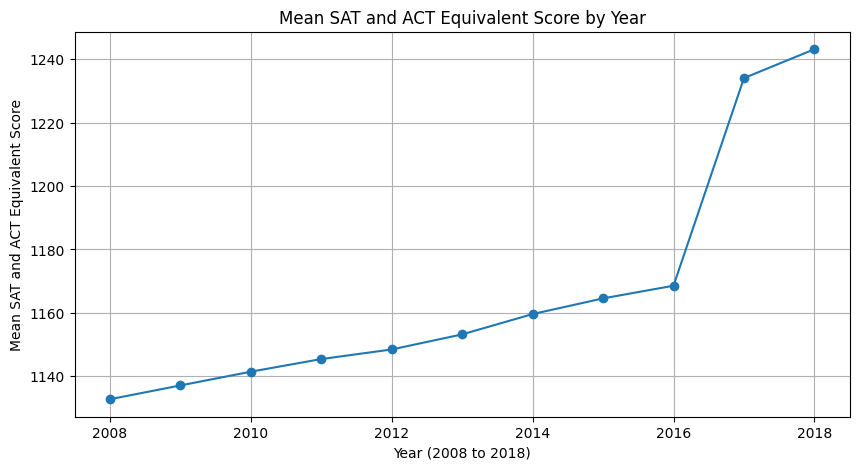

,Year,Mean SAT Score
0,2008.0,1132.735413
1,2009.0,1137.080856
2,2010.0,1141.421238
3,2011.0,1145.406751
4,2012.0,1148.441105
5,2013.0,1153.200648
6,2014.0,1159.610060
7,2015.0,1164.559534
8,2016.0,1168.557638
9,2017.0,1234.094960


In [27]:
weighted_scores = processed_data.groupby('Year').apply(
    lambda x: (x['SAT_AVG (Y to Y+1)'] * x['Undergraduate Size (Y to Y+1)']).sum() / x['Undergraduate Size (Y to Y+1)'].sum()
)

# Reset index to simplify plotting
weighted_scores = weighted_scores.reset_index(name='Mean SAT Score')
import matplotlib.pyplot as plt

# Plotting the weighted mean SAT scores by year
plt.figure(figsize=(10, 5))
plt.plot(weighted_scores['Year'], weighted_scores['Mean SAT Score'], marker='o')
plt.title('Mean SAT and ACT Equivalent Score by Year')
plt.xlabel('Year (2008 to 2018)')
plt.ylabel('Mean SAT and ACT Equivalent Score')
plt.grid(True)
plt.show()
weighted_scores


The visual depicts the trend of mean SAT and ACT equivalent scores from 2009 to 2020. There is a significant increase after 2016, correlating with the SAT scoring change from a 2400-point scale to a 1600-point scale. While the scores are adjusted for this change, the sharp uptick suggests that the new version of the SAT may be contributing to higher average scores. This raises questions about the comparative difficulty of the exams or other underlying factors that could be influencing this trend. It may be beneficial to investigate further, controlling for the change in scoring and other variables, to understand the true nature of the apparent increase in standardized test performance.

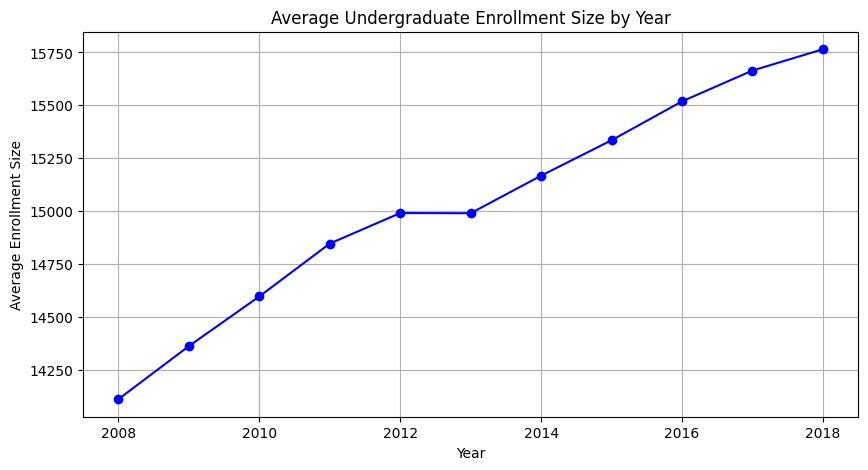

In [28]:
average_enrollment = processed_data.groupby('Year')['Undergraduate Size (Y to Y+1)'].mean()

# Reset the index to simplify plotting
average_enrollment = average_enrollment.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(average_enrollment['Year'], average_enrollment['Undergraduate Size (Y to Y+1)'], marker='o', color='b')
plt.title('Average Undergraduate Enrollment Size by Year')
plt.xlabel('Year')
plt.ylabel('Average Enrollment Size')
plt.grid(True)
plt.show()

The visual portrays a steady upward trend in the average undergraduate enrollment size by year over a 12-year period, indicating a consistent increase in the number of students attending these institutions. This pattern may suggest that colleges and universities are expanding their student bodies or that more students are seeking higher education. The unbroken ascent from just over 14,250 to nearly 16,000 underscores a growth in the college-going population, which could reflect broader educational trends, policy changes, or demographic shifts. 

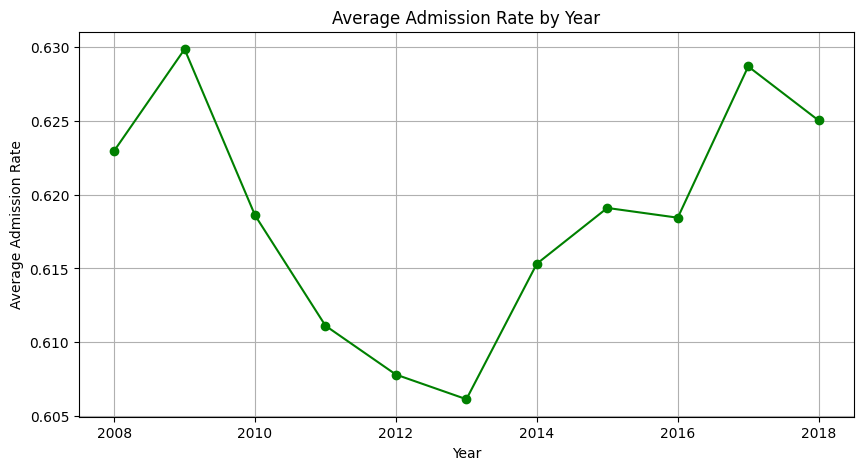

In [29]:
average_admission_rate = processed_data.groupby('Year')['Admission Rate (Y to Y+1)'].mean()

# Reset the index to simplify plotting
average_admission_rate = average_admission_rate.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(average_admission_rate['Year'], average_admission_rate['Admission Rate (Y to Y+1)'], marker='o', color='green')
plt.title('Average Admission Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.grid(True)
plt.show()

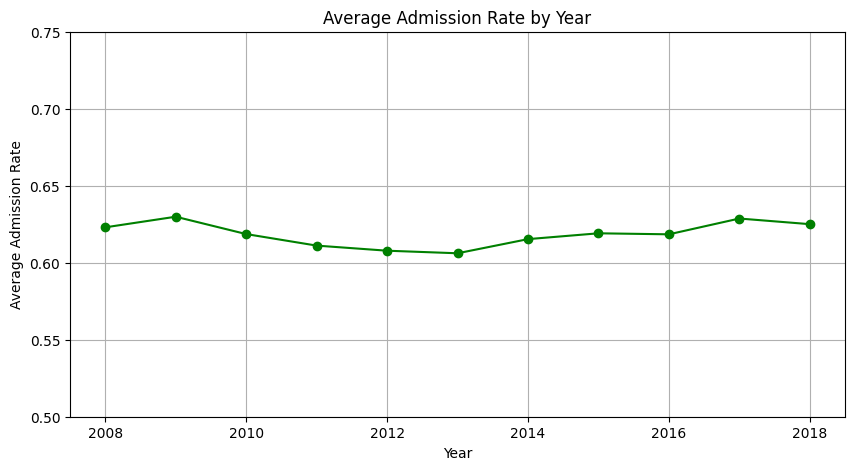

In [30]:
# Plotting the average admission rate by year with x-axis limits set from 0.5 to 0.75
plt.figure(figsize=(10, 5))
plt.plot(average_admission_rate['Year'], average_admission_rate['Admission Rate (Y to Y+1)'], marker='o', color='green')
plt.title('Average Admission Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.ylim(0.5, 0.75)  # Setting the y-axis limit from 0.5 to 0.75
plt.grid(True)
plt.show()

The two visuals depict the average admission rate by year over a 12-year period for teams that made it to March Madness. The first graph with compressed y-axis from approximately 0.6 to 0.635 revealing that the admission rates got higher. However, the second graph, with a y-axis spanning from 0.5 to 0.75, shows relatively minor fluctuations in the admission rate. The variation in the y-axis scale between the two graphs highlights how graphical representation can affect the perception of data. Despite the seemingly dramatic movements in the first graph, the second graph clarifies that there has been no significant change in the admission rates of March Madness teams over the years.

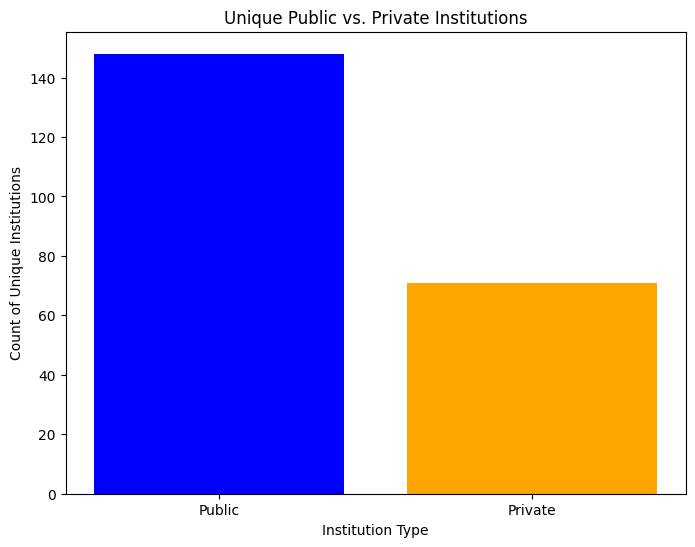

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('final_data/processed_data.csv')  # Replace with the path to the CSV file you have

unique_schools = data.drop_duplicates(subset='School Identifier')
type_counts = unique_schools['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create a bar graph using Matplotlib
plt.figure(figsize=(8, 6))  # Adjust the figure size

# Plot the bars
plt.bar(type_counts['Type'], type_counts['Count'], color=['blue', 'orange'])

# Add labels and title
plt.title('Unique Public vs. Private Institutions')
plt.xlabel('Institution Type')
plt.ylabel('Count of Unique Institutions')

# Set custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])

# Show the plot
plt.show()


The visual presents a comparative analysis of the average number of public and private institutions per year, based on the data over a 12-year span. The bar graph distinctly shows a higher average number of public institutions than private ones per year, with public institutions exceeding the 150 mark while private institutions are under 100.

## Regression Results

In [31]:
import pandas as pd
import plotly.graph_objects as go

results_rounded = results.round(3).reset_index()

# Create table figure using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_rounded.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[results_rounded[col] for col in results_rounded.columns],
               fill_color='lavender',
               align='left'))
])

# Update layout
fig.update_layout(title_text="Regression Results", height=1000, width=900)

# Show the plot
fig.show()


In [37]:
import plotly.graph_objects as go

# Data from the table in the image
row_labels = [
    'const', 'Cinderella_0 (Y)', 'Cinderella_1 (Y)', 'Cinderella_2 (Y)', 'Cinderella_3+ (Y)', 'Type',
    'SAT_AVG (Y to Y+1)', 'Undergraduate Size (Y to Y+1)', 'Year_2008.0', 'Year_2009.0', 'Year_2010.0',
    'Year_2011.0', 'Year_2012.0', 'Year_2013.0', 'Year_2014.0', 'Year_2015.0', 'Year_2016.0',
    'Year_2017.0', 'Year_2018.0'
]
header = ['Variable', 'coef', 'std err', 't', 'P>|t|']
values = [
    row_labels,
    [18.33, 1.85, 3.16, 6.57, 6.75, 1.64, 0.99, 0.00, -3.60, -3.87, -3.09, -4.84, -4.19, -2.96, -3.74, -4.02, 56.02, 0.91, -8.30],
    [2.93, 1.35, 1.96, 2.95, 3.61, 1.23, 0.00, 0.00, 1.23, 1.23, 1.23, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.30, 1.31],
    [6.26, 1.37, 1.61, 2.23, 1.87, 1.33, 286.08, 3.09, -2.93, -3.15, -2.52, -3.93, -3.40, -2.40, -3.02, -3.24, 45.18, 0.70, -6.36],
    [0.00, 0.17, 0.11, 0.03, 0.06, 0.18, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0.49, 0.00]
]

# Create the Plotly table
fig = go.Figure(data=[go.Table(
    columnwidth=[200, 80, 80, 80, 80],  # Specify column widths
    header=dict(values=header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=values,
               fill_color='lavender',
               align='left'))
])

# Set the dimensions of the figure
fig.update_layout(
    width=1200,
    height=600
)

# Display the table
fig.show()


In [39]:
import plotly.graph_objects as go

# Data from the new regression results in the image
row_labels = [
    'const', 'Cinderella_0 (Y)', 'Cinderella_1 (Y)', 'Cinderella_2 (Y)', 'Cinderella_3+ (Y)', 'Type',
    'Admission Rate (Y to Y+1)', 'Undergraduate Size (Y to Y+1)', 'Year_2008.0', 'Year_2009.0', 'Year_2010.0',
    'Year_2011.0', 'Year_2012.0', 'Year_2013.0', 'Year_2014.0', 'Year_2015.0', 'Year_2016.0',
    'Year_2017.0', 'Year_2018.0'
]
header = ['Variable', 'coef', 'std err', 't', 'P>|t|']
values = [
    row_labels,
    [0.029, 0.010, 0.021, -0.005, 0.003, -0.017, 0.958, -0.000, 0.008, -0.010, -0.006, -0.002, -0.001, 0.010, 0.005, 0.001, 0.012, -0.002, 0.012],
    [0.006, 0.004, 0.007, 0.010, 0.013, 0.004, 0.007, 0.000, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004],
    [4.585, 2.171, 3.164, -0.503, 0.272, -4.173, 136.756, -3.270, 1.871, -2.298, -1.403, -0.396, -0.142, 2.377, 1.240, 0.179, 2.745, -0.336, 2.793],
    [0.000, 0.030, 0.002, 0.615, 0.786, 0.000, 0.000, 0.001, 0.061, 0.022, 0.161, 0.692, 0.887, 0.018, 0.215, 0.858, 0.006, 0.737, 0.005]
]

# Create the Plotly table
fig = go.Figure(data=[go.Table(
    columnwidth=[200, 80, 80, 80, 80],  # Specify column widths
    header=dict(values=header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=values,
               fill_color='lavender',
               align='left'))
])

# Set the dimensions of the figure
fig.update_layout(
    width=1200,
    height=600
)

# Display the table
fig.show()
